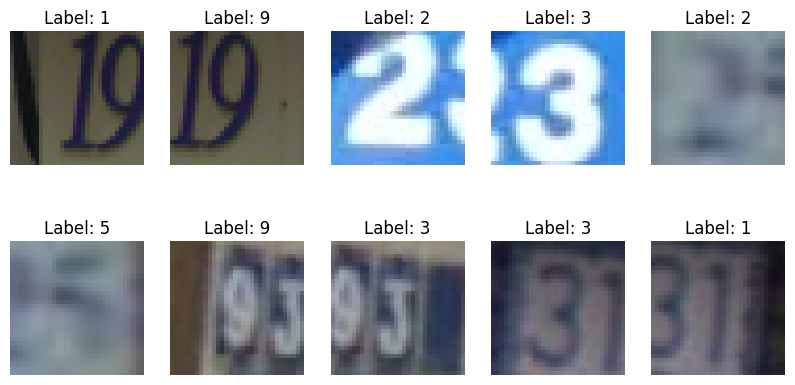

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 52s 44ms/step - accuracy: 0.4416 - loss: 1.5958 - val_accuracy: 0.8368 - val_loss: 0.5627
Epoch 2/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 49s 43ms/step - accuracy: 0.8586 - loss: 0.4801 - val_accuracy: 0.8689 - val_loss: 0.4544
Epoch 3/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.8861 - loss: 0.3913 - val_accuracy: 0.8800 - val_loss: 0.4161
Epoch 4/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.9024 - loss: 0.3375 - val_accuracy: 0.8844 - val_loss: 0.3928
Epoch 5/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.9090 - loss: 0.3065 - val_accuracy: 0.8906 - val_loss: 0.3701
Epoch 6/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 47s 41ms/step - accuracy: 0.9189 - loss: 0.2755 - val_accuracy: 0.8980 - val_loss: 0.3555
Epoch 7/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 47s 41ms/step - accuracy: 0.9223 - loss: 0.2611 - val_accuracy: 0.8936 - val_loss: 0.3726
Epoch 8/10
1145/1145 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.9281 -

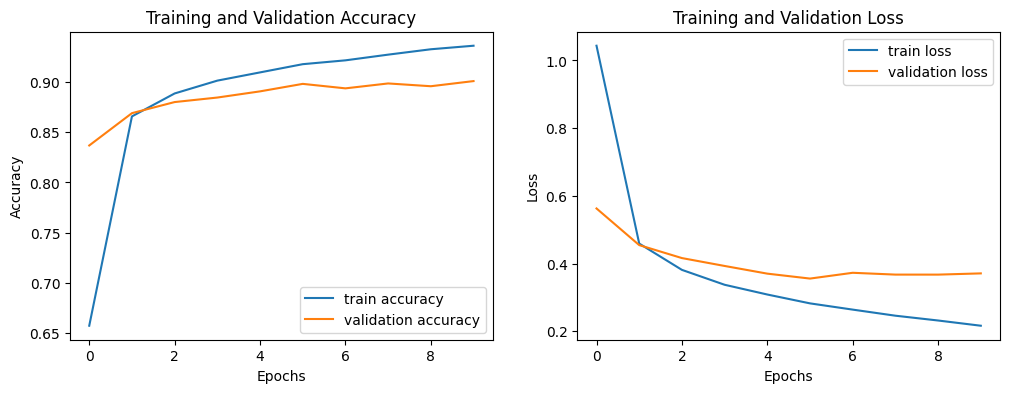

In [106]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# Load the SVHN dataset (train and test)
def load_data(path):
    """ Helper function to load the .mat file format used in SVHN dataset """
    data = loadmat(path)
    return data['X'], data['y']

# Load the training and test data
X_train, y_train = load_data("/kaggle/input/svhndataset/train_32x32.mat")
X_test, y_test = load_data("/kaggle/input/svhndataset/test_32x32.mat")

# Fix the shape of the input data (move axis to correct shape)
X_train = np.moveaxis(X_train, -1, 0)  # Should be (73257, 32, 32, 3)
X_test = np.moveaxis(X_test, -1, 0)    # Should be (26032, 32, 32, 3)

# Convert the labels where '10' is used for '0' digits
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Normalize the pixel values of the images (from 0-255 to 0-1)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Display sample images from the dataset
def display_sample_images(X, y, num_samples=10):
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        plt.imshow(X[i])
        plt.title(f"Label: {np.argmax(y[i])}")
        plt.axis('off')
    plt.show()

# Show 10 sample images from the training set
display_sample_images(X_train, y_train)

# Build the CNN model
model = models.Sequential()

# Add convolutional layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output from the conv layers before feeding into the dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# Add the output layer (10 classes for digits 0-9)
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model
model.summary()

# Train the CNN model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training & validation accuracy/loss over epochs
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
